Analysis results of tFilterMetric

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db


In [2]:
filename = './data/tFilter_ri_baseline_v1.4_10yrs.db_nside16.pkl'
df = pd.read_pickle(filename)


In [3]:
def cal_diffmat(df):
    "calculate time gaps from visit timeCol of two filters"
    
    t_f0 = df['t_f0']
    t_f1 = df['t_f1']
    
    t_f0 = t_f0.reshape((len(t_f0), 1))
    t_f1 = t_f1.reshape((len(t_f1), 1))
        
    diffmat = np.abs( np.subtract(t_f0, t_f1.T) )
    
    return diffmat


In [188]:
df.head()

,ra,dec,f0,f1,t_f0,t_f1
0,81.967459,34.322603,y,y,[],[]
1,86.055186,34.240565,y,y,[],[]
2,94.017915,34.343620,y,y,[],[]
3,98.854745,34.163379,y,y,[],[]
4,103.259957,34.104727,y,y,[],[]


In [189]:
df['diffmat'] = df.apply(cal_diffmat, axis=1)
df['dT'] = df.apply(cal_dT, axis=1)
df['nvisits'] = df.apply(get_nvisits, tmax=1.5, axis=1)

In [192]:
df

,ra,dec,f0,f1,t_f0,t_f1,diffmat,dT,nvisits
0,81.967459,34.322603,y,y,[],[],[],[],-inf
1,86.055186,34.240565,y,y,[],[],[],[],-inf
2,94.017915,34.343620,y,y,[],[],[],[],-inf
3,98.854745,34.163379,y,y,[],[],[],[],-inf
4,103.259957,34.104727,y,y,[],[],[],[],-inf
5,299.314113,34.633594,y,y,"[60073.36145480394, 60073.37588214927]","[60073.36145480394, 60073.37588214927]","[[0.0, 0.014427345326112118], [0.0144273453261...",[0.014427345326112118],1.0
6,61.552051,31.146198,y,y,[],[],[],[],-inf
7,67.853758,31.627732,y,y,[],[],[],[],-inf
8,73.770025,32.050974,y,y,[],[],[],[],-inf
9,78.498447,32.551138,y,y,[],[],[],[],-inf


In [4]:
def cal_dT(df):
    
    if df.f0==df.f1:
        # get only triangle part
        dt_tri = np.tril(df['diffmat'], -1)
        # dT = dt_tri[dt_tri!=0]

    else:
        dT = df['diffmat'].flatten()
    
    return dT

In [166]:
def load_df_dict(dbname='', nside=8, DD=False):    
    # load the data
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    #fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    df_dict = {}
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            if DD:
                filename = 'data/tFilter_{}{}_{}_nside{}_DD.pkl'.format(f0, f1, dbname, nside)
            else:
                filename = 'data/tFilter_{}{}_{}_nside{}_noDD.pkl'.format(f0, f1, dbname, nside)
            print("loading " + filename)
            df = pd.read_pickle(filename)
            df_dict['{}{}'.format(f0, f1)] = df
    return df_dict


In [177]:
def plot_hist_triangle_all(dbname='', DD=False, nside=8, tmin=0, tmax=1.5, vmax=10000):
    """plot hist of all possible gaps within tmin~tmax, in hours"""
    df_dict = load_df_dict(dbname=dbname, DD=DD, nside=nside)
    fig, axs = plt.subplots(6, 6, figsize=(24, 24), constrained_layout=True); # 6 axes on a 2x3 grid
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}

    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            # filename = 'data/tFilter_{}{}_{}.pkl'.format(f0, f1, dbname)
            #df = pd.read_pickle(filename)
            df = df_dict['{}{}'.format(f0, f1)]

            #axs[fdict[f0], fdict[f1]].hist(dT[dT<1/24],bins=100); 
            if f0==f1:

                # concatenate dT
                df['diffmat'] = df.apply(cal_diffmat, axis=1)
                df['dT'] = df.apply(cal_dT, axis=1)
                
                dT = np.concatenate(df['dT']) * 24
                
                dT_tlim = dT[(dT>tmin)&(dT<tmax)] 
                Ntotal = len(dT_tlim)

                norm = matplotlib.colors.Normalize(vmin=0, vmax=vmax)
                cmap = matplotlib.cm.Reds
                m = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                values, bins, _ = axs[fdict[f0], fdict[f1]].hist(dT_tlim, bins=50, color=m.to_rgba(Ntotal) );

                axs[fdict[f1], fdict[f0]].set_title(f0+f1+ ' ' + str(Ntotal) )

                #axs[fdict[f0], fdict[f1]].set_xlabel('dT')

            else:

                
                df['diffmat'] = df.apply(cal_diffmat, axis=1)
                df['dT'] = df.apply(cal_dT, axis=1)
                
                dT = np.concatenate(df['dT']) * 24   # convert to hour
                
                dT_tlim = dT[(dT>tmin)&(dT<tmax)]

                axs[fdict[f0], fdict[f1]].axis('off')
                """
                axs[fdict[f1], fdict[f0]].hist(dT[dT<tlim/24]*24,bins=50);        
                # axs[fdict[f1], fdict[f0]].set_xlabel(f0+f1)
                axs[fdict[f1], fdict[f0]].set_title(f0+f1)
                """
                Ntotal = len(dT_tlim)
                norm = matplotlib.colors.Normalize(vmin=0, vmax=vmax)
                cmap = matplotlib.cm.Reds
                m = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                values, bins, _ = axs[fdict[f1], fdict[f0]].hist(dT_tlim, bins=50, color=m.to_rgba(Ntotal) );

                axs[fdict[f1], fdict[f0]].set_title(f0+f1+' '+ str(Ntotal) )

    m.set_array(np.linspace(0, vmax) )            
    fig.colorbar(mappable=m, ax=axs[:,:], shrink=0.6, location='bottom')


In [168]:
def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', vmax=None):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> plot_mwd(df['ra'], df['dec'], df['metricValues'])
    '''
    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='o', vmin=0, vmax=vmax)  # convert degrees to radians
    # ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)


In [169]:
def get_nvisits(df, tmin=0, tmax=1.5):
    dT = df['dT']
    dT = dT[ (dT>tmin) & (dT<=tmax/24) ]
    if len(dT)>0:
        return len(dT)
    else:
        return -np.inf


In [170]:
def get_tmin(df, tmin=0, tmax=1.5):
    dT =df['dT']
    dT = dT[ (dT>tmin) & (dT<=tmax/24) ]
    if len(dT)!=0:
        return np.min(dT)*24
    else:
        return -np.inf
    

In [171]:
def plot_skymaps(dbname='', DD=False, nside=8, vmax=None):
    # plot skymap
    df_dict = load_df_dict(dbname=dbname, DD=DD, nside=nside)

    fig, axs = plt.subplots(6, 6, figsize=(28, 28), 
                            subplot_kw={'projection': 'mollweide'}); # 6 axes on a 2x3 grid
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:

            filename = '{}{}'.format(f0, f1)    
            df = df_dict[filename]
            
            df['diffmat'] = df.apply(cal_diffmat, axis=1)
            df['dT'] = df.apply(cal_dT, axis=1)
            df['nvisits'] = df.apply(get_nvisits, tmax=1.5, axis=1)
            
            if f0==f1:
                ax = axs[fdict[f0], fdict[f1]]
                plot_mwd(ax, df.ra.values, df.dec.values, vmax=vmax,
                         c=df.nvisits.values)
                nv = df.nvisits.values[df.nvisits.values!=-np.inf]
                ax.set_title(f0+f1+' '+ str(np.sum(nv)) )
            else:
                axs[fdict[f0], fdict[f1]].axis('off')
                ax = axs[fdict[f1], fdict[f0]]
                plot_mwd(ax, df.ra.values, df.dec.values, vmax=vmax,
                         c=df.nvisits.values)
                nv = df.nvisits.values[df.nvisits.values!=-np.inf]
                ax.set_title(f0+f1+' '+ str(np.sum(nv) ))


---

In [76]:
df_dict = load_df_dict(dbname="baseline_v1.4_10yrs.db")

In [78]:
df_dict.keys()

dict_keys(['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy'])

In [85]:
df = df_dict['ri']

In [86]:
df.head()

,ra,dec,f0,f1,t_f0,t_f1,diffmat,dT
0,81.967459,34.322603,r,i,[],[59942.16876535677],[],[]
1,86.055186,34.240565,r,i,[59991.04734179399],[59991.06388307742],[[0.016541283432161435]],[0.016541283432161435]
2,94.017915,34.343620,r,i,[59928.19127766554],[59928.20783893038],[[0.01656126484158449]],[0.01656126484158449]
3,98.854745,34.163379,r,i,[],[59984.082762505095],[],[]
4,103.259957,34.104727,r,i,[],[],[],[]


In [93]:
df['diffmat'] = df.apply(cal_diffmat, axis=1)
df['dT'] = df.apply(cal_dT, axis=1)
df['nvisits'] = df.apply(get_nvisits, tmax=1.5, axis=1)

In [94]:
df.head()

,ra,dec,f0,f1,t_f0,t_f1,diffmat,dT,nvisits
0,81.967459,34.322603,r,i,[],[59942.16876535677],[],[],inf
1,86.055186,34.240565,r,i,[59991.04734179399],[59991.06388307742],[[0.016541283432161435]],[0.016541283432161435],1.0
2,94.017915,34.343620,r,i,[59928.19127766554],[59928.20783893038],[[0.01656126484158449]],[0.01656126484158449],1.0
3,98.854745,34.163379,r,i,[],[59984.082762505095],[],[],inf
4,103.259957,34.104727,r,i,[],[],[],[],inf


In [107]:
nv = df.nvisits[ df.nvisits.values!=np.inf ]


In [110]:
nv.sort_values(ascending=False)

1545    18849.0
590     17431.0
1233     7212.0
1878     5611.0
419      4424.0
1481      842.0
1169      413.0
1200       37.0
1528       36.0
499        30.0
1328       29.0
877        28.0
752        28.0
947        28.0
1684       27.0
1465       27.0
1598       27.0
1749       27.0
884        26.0
682        26.0
1701       26.0
1633       26.0
809        26.0
637        25.0
1263       25.0
1416       25.0
1764       25.0
1748       25.0
1529       25.0
436        25.0
         ...   
126         1.0
120         1.0
1968        1.0
1970        1.0
114         1.0
113         1.0
112         1.0
111         1.0
1947        1.0
1946        1.0
1945        1.0
162         1.0
208         1.0
207         1.0
1904        1.0
199         1.0
1911        1.0
1914        1.0
192         1.0
189         1.0
1916        1.0
185         1.0
1921        1.0
177         1.0
1932        1.0
1933        1.0
1934        1.0
1936        1.0
163         1.0
1           1.0
Name: nvisits, Length: 1

In [119]:
df.iloc[[1545, 590, 1233, 1878, 419]]

,ra,dec,f0,f1,t_f0,t_f1,diffmat,dT,nvisits
1545,9.451477,-44.052126,r,i,"[59854.16099562949, 59854.16137757393, 59854.1...","[59854.137801185316, 59854.138183129755, 59854...","[[0.02319444417662453, 0.02281249973748345, 0....","[0.02319444417662453, 0.02281249973748345, 0.0...",18849.0
590,35.740072,-4.770666,r,i,"[59854.257847731715, 59854.258229676154, 59854...","[59854.24884310219, 59854.24922504663, 59854.2...","[[0.009004629522678442, 0.008622685083537363, ...","[0.009004629522678442, 0.008622685083537363, 0...",17431.0
1233,53.154606,-28.523674,r,i,"[59861.16557645713, 59861.16595840157, 59861.1...","[59861.15657182761, 59861.15695377205, 59861.1...","[[0.009004629522678442, 0.008622685083537363, ...","[0.009004629522678442, 0.008622685083537363, 0...",7212.0
1878,348.257814,-63.365747,r,i,"[59856.31340654069, 59856.31877426873, 59857.3...","[59856.329179380744, 59856.334544174075, 59856...","[[0.015772840051795356, 0.02113763338275021, 0...","[0.015772840051795356, 0.02113763338275021, 0....",5611.0
419,150.541080,2.244466,r,i,"[59931.34451147615, 59935.31903430803, 59943.3...","[59930.30817440316, 59931.33271648639, 59937.3...","[[1.0363370729901362, 0.011794989761256147, 5....","[1.0363370729901362, 0.011794989761256147, 5.9...",4424.0


In [52]:
a = nvisits.values[nvisits.values != np.inf]

(0, 50)

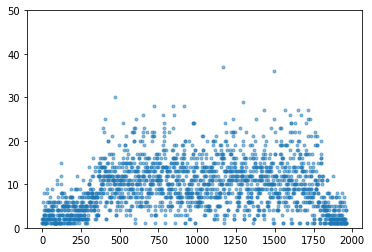

In [68]:
plt.plot(a, '.',alpha=0.5)
plt.ylim([0, 50])

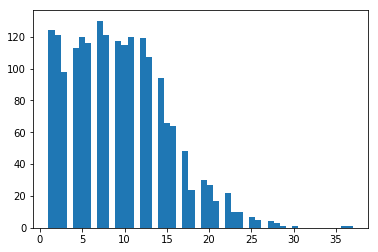

In [62]:
plt.hist(a[a<200], bins=50);

---

loading data/tFilter_uu_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ug_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ur_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ui_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_uz_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_uy_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gg_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gr_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gi_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gz_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gy_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_rr_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ri_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_rz_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ry_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ii_baseline_v1.4_10yrs.db_nside8_n

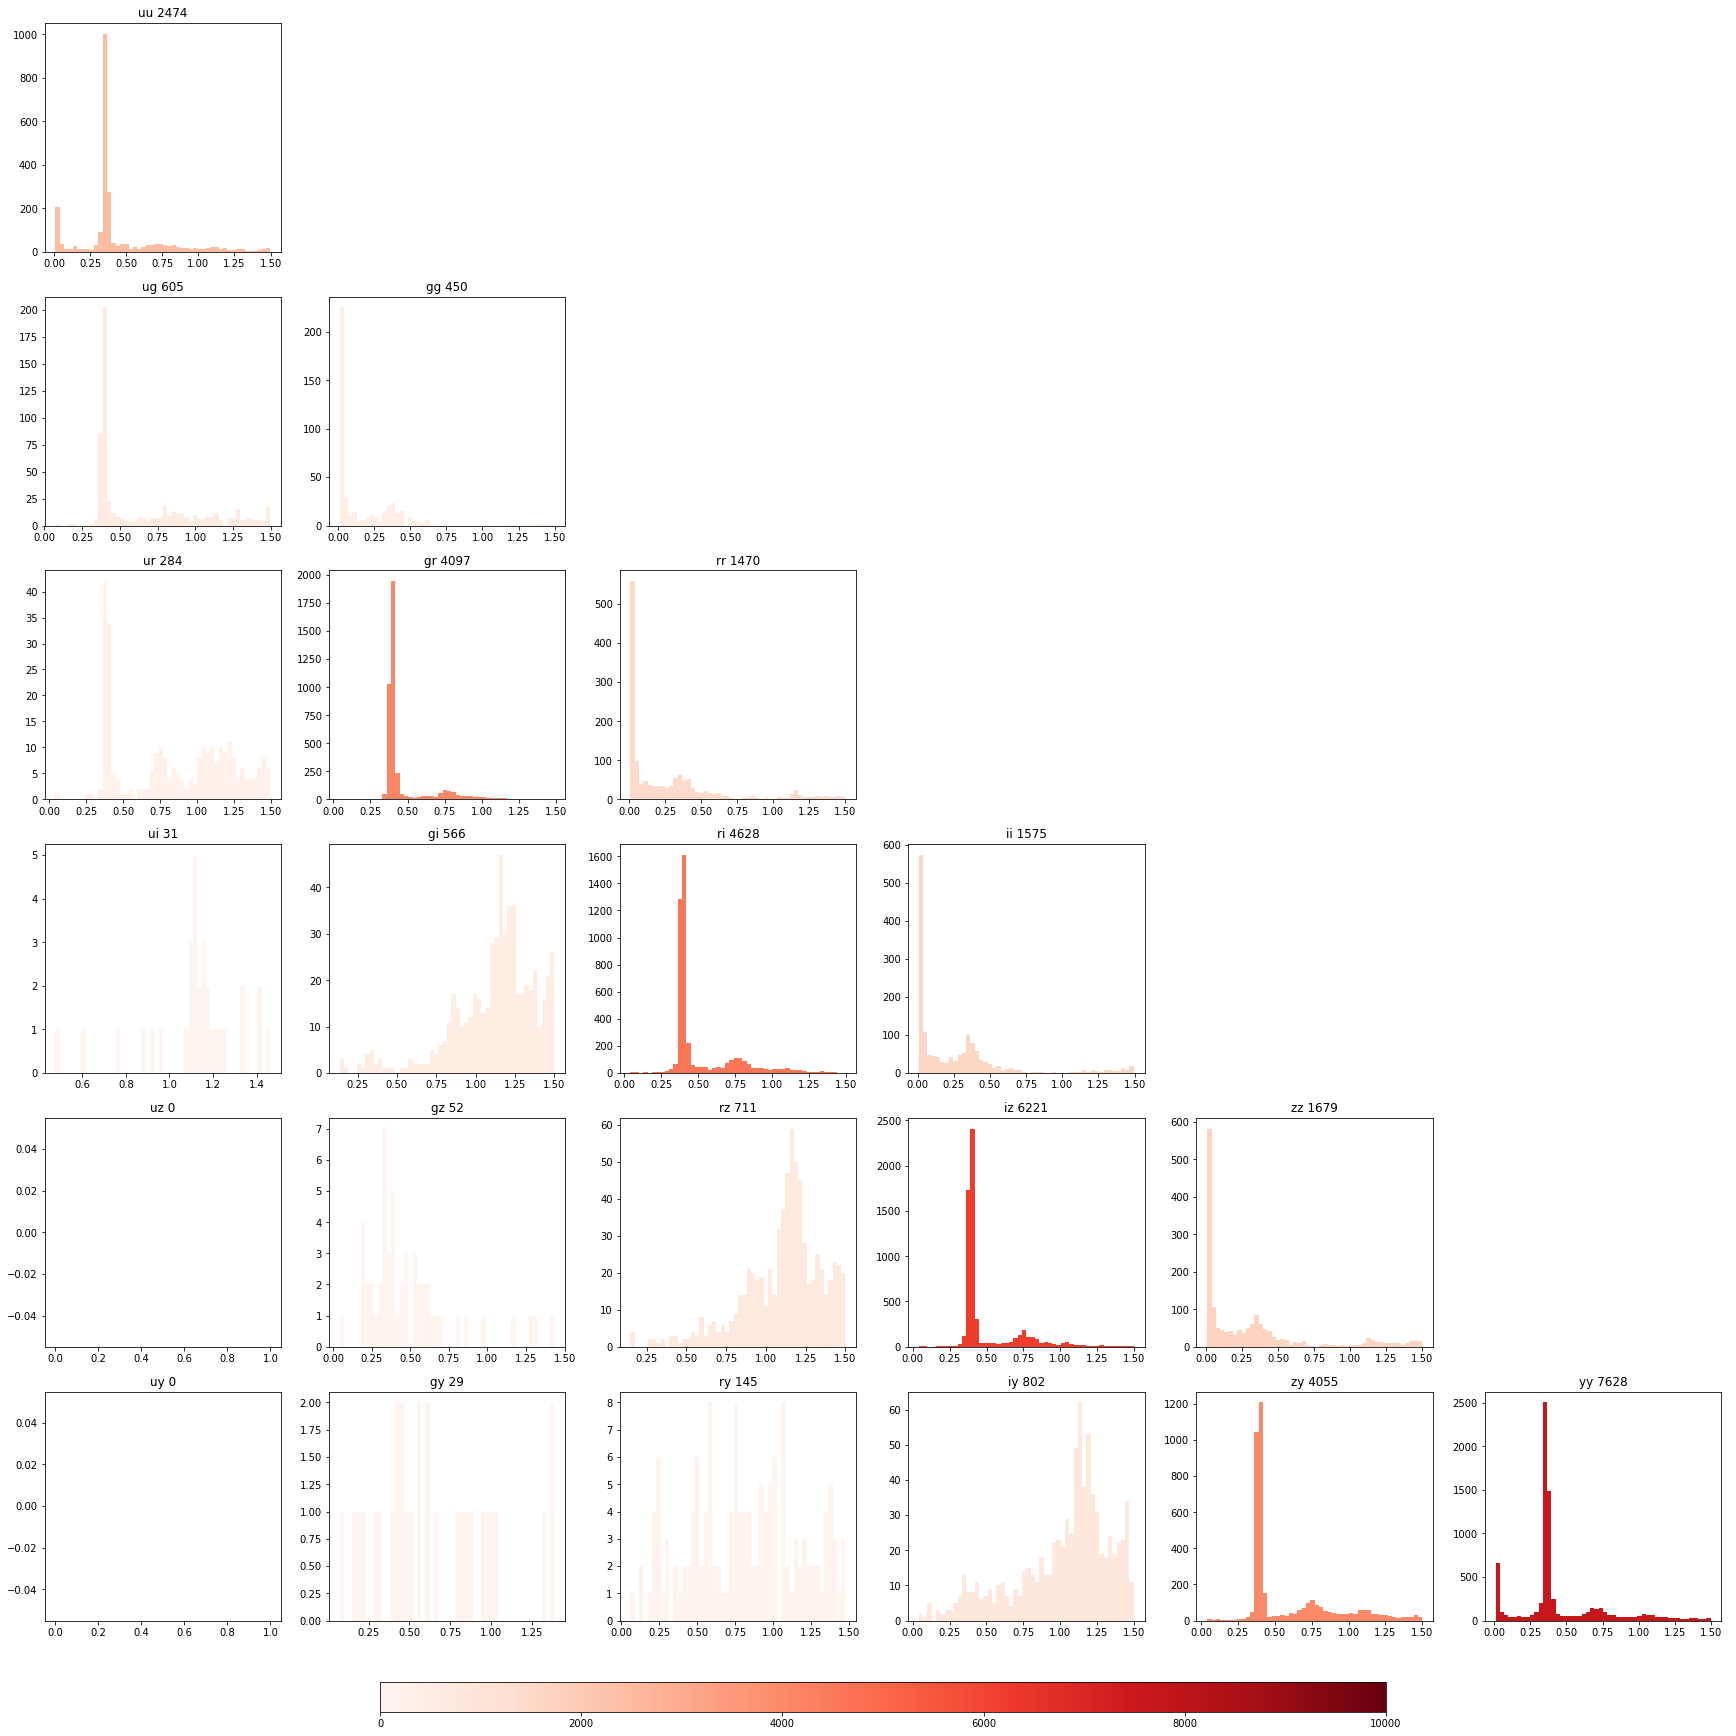

In [172]:
plot_hist_triangle_all(dbname="baseline_v1.4_10yrs.db", DD=False)


loading data/tFilter_uu_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ug_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ur_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ui_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_uz_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_uy_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gg_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gr_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gi_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gz_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_gy_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_rr_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ri_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_rz_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ry_baseline_v1.4_10yrs.db_nside8_noDD.pkl
loading data/tFilter_ii_baseline_v1.4_10yrs.db_nside8_n

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


CPU times: user 13.5 s, sys: 4 s, total: 17.5 s
Wall time: 12.8 s


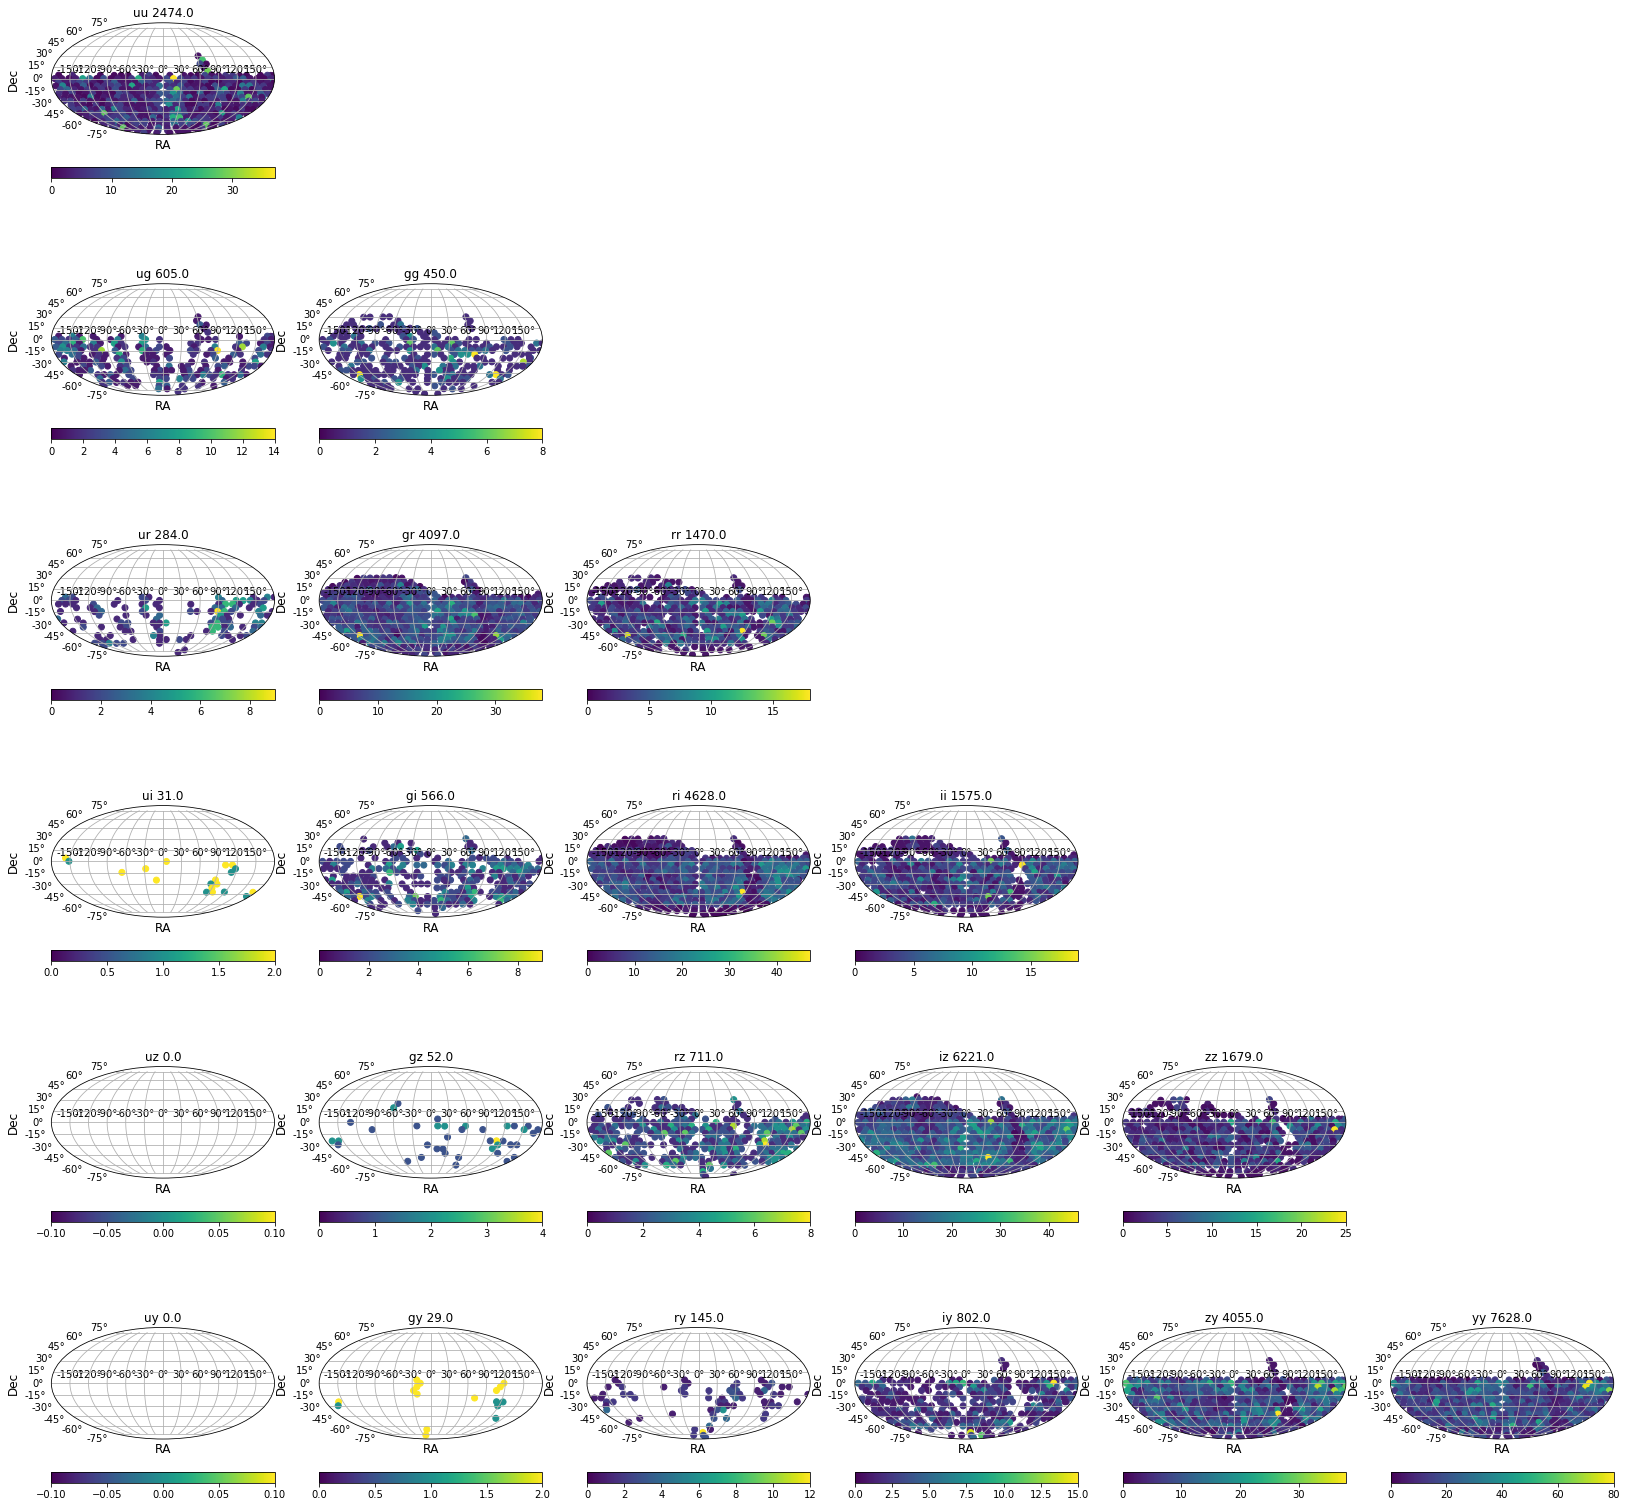

In [151]:
%%time
plot_skymaps(dbname="baseline_v1.4_10yrs.db", vmax=None, )

loading data/tFilter_uu_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ug_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ur_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ui_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_uz_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_uy_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gg_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gr_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gi_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gz_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gy_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_rr_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ri_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_rz_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ry_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ii_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_iz_

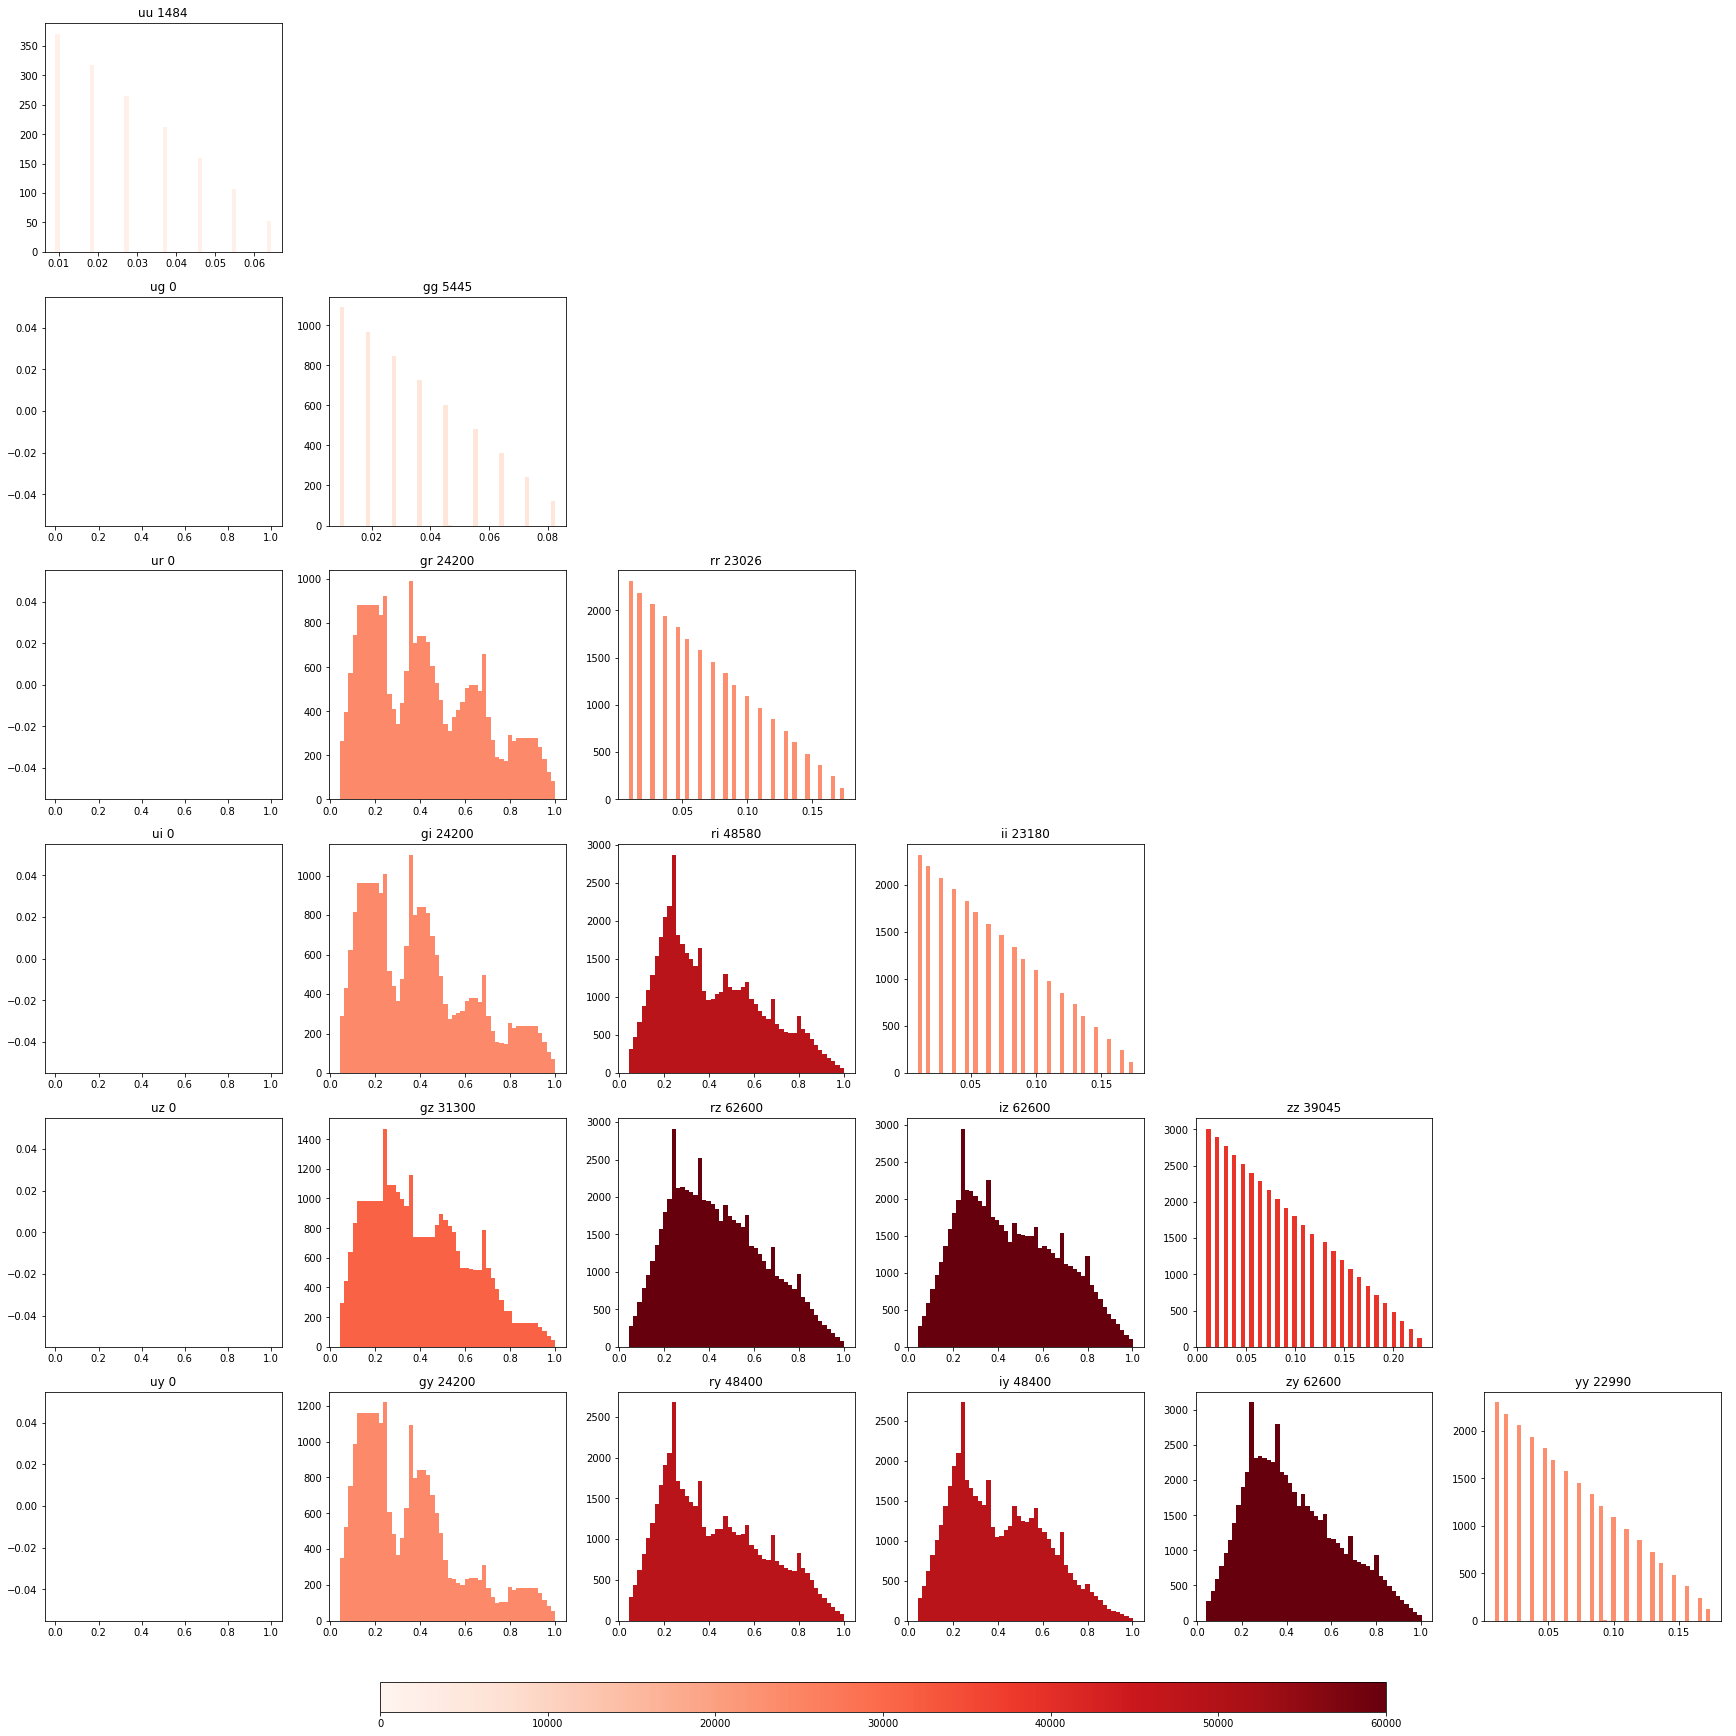

In [185]:
plot_hist_triangle_all(dbname="baseline_v1.4_10yrs.db", DD=True, vmax=60000)


loading data/tFilter_uu_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ug_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ur_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ui_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_uz_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_uy_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gg_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gr_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gi_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gz_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_gy_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_rr_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ri_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_rz_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ry_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_ii_baseline_v1.4_10yrs.db_nside8_DD.pkl
loading data/tFilter_iz_

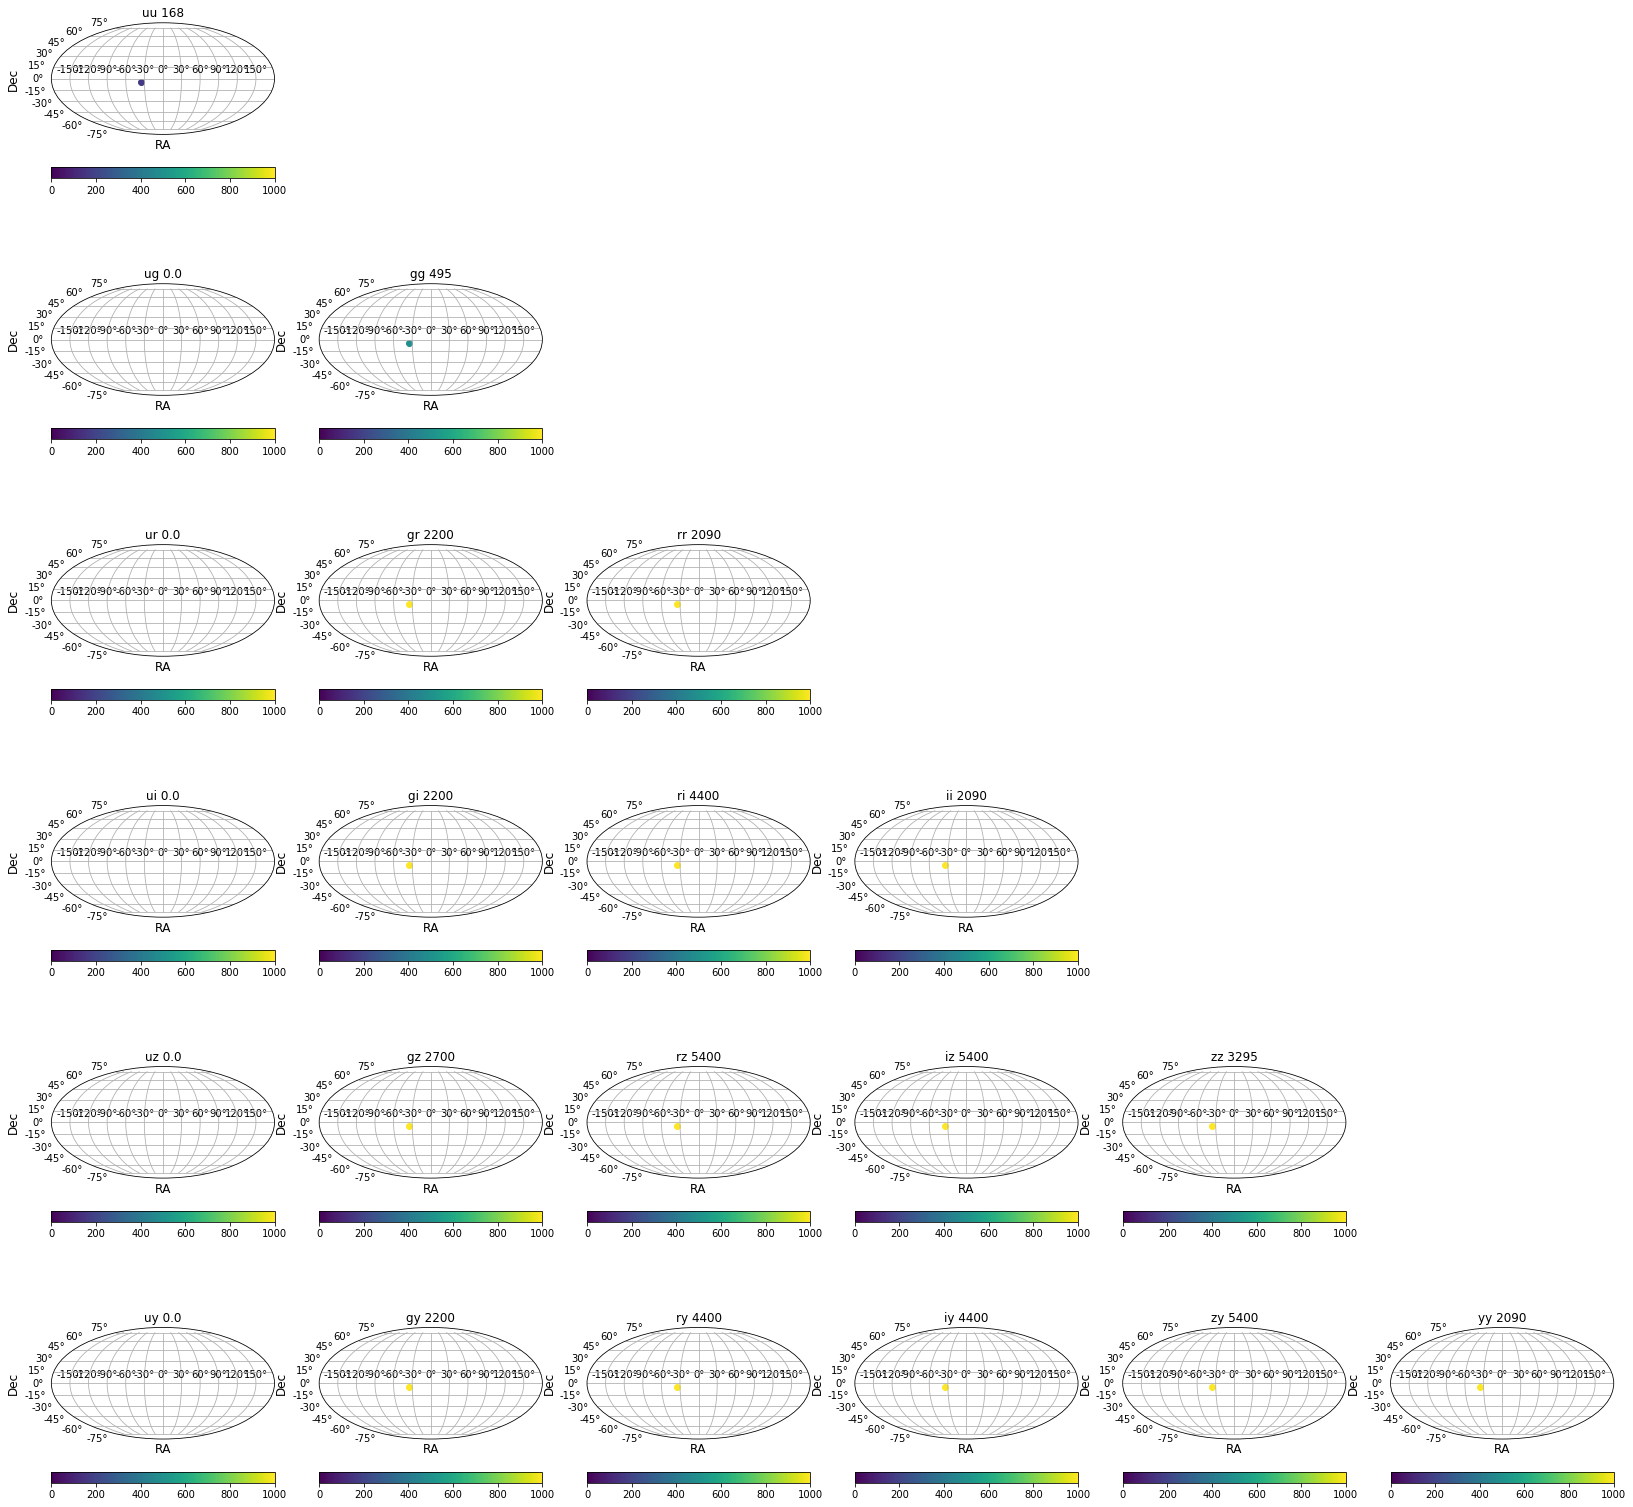

In [161]:
plot_skymaps(dbname="baseline_v1.4_10yrs.db", DD=True, vmax=1000)

loading data/tFilter_uu_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ug_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ur_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ui_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_uz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_uy_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gg_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gr_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gi_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gy_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_rr_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ri_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_rz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ry_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ii_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading 

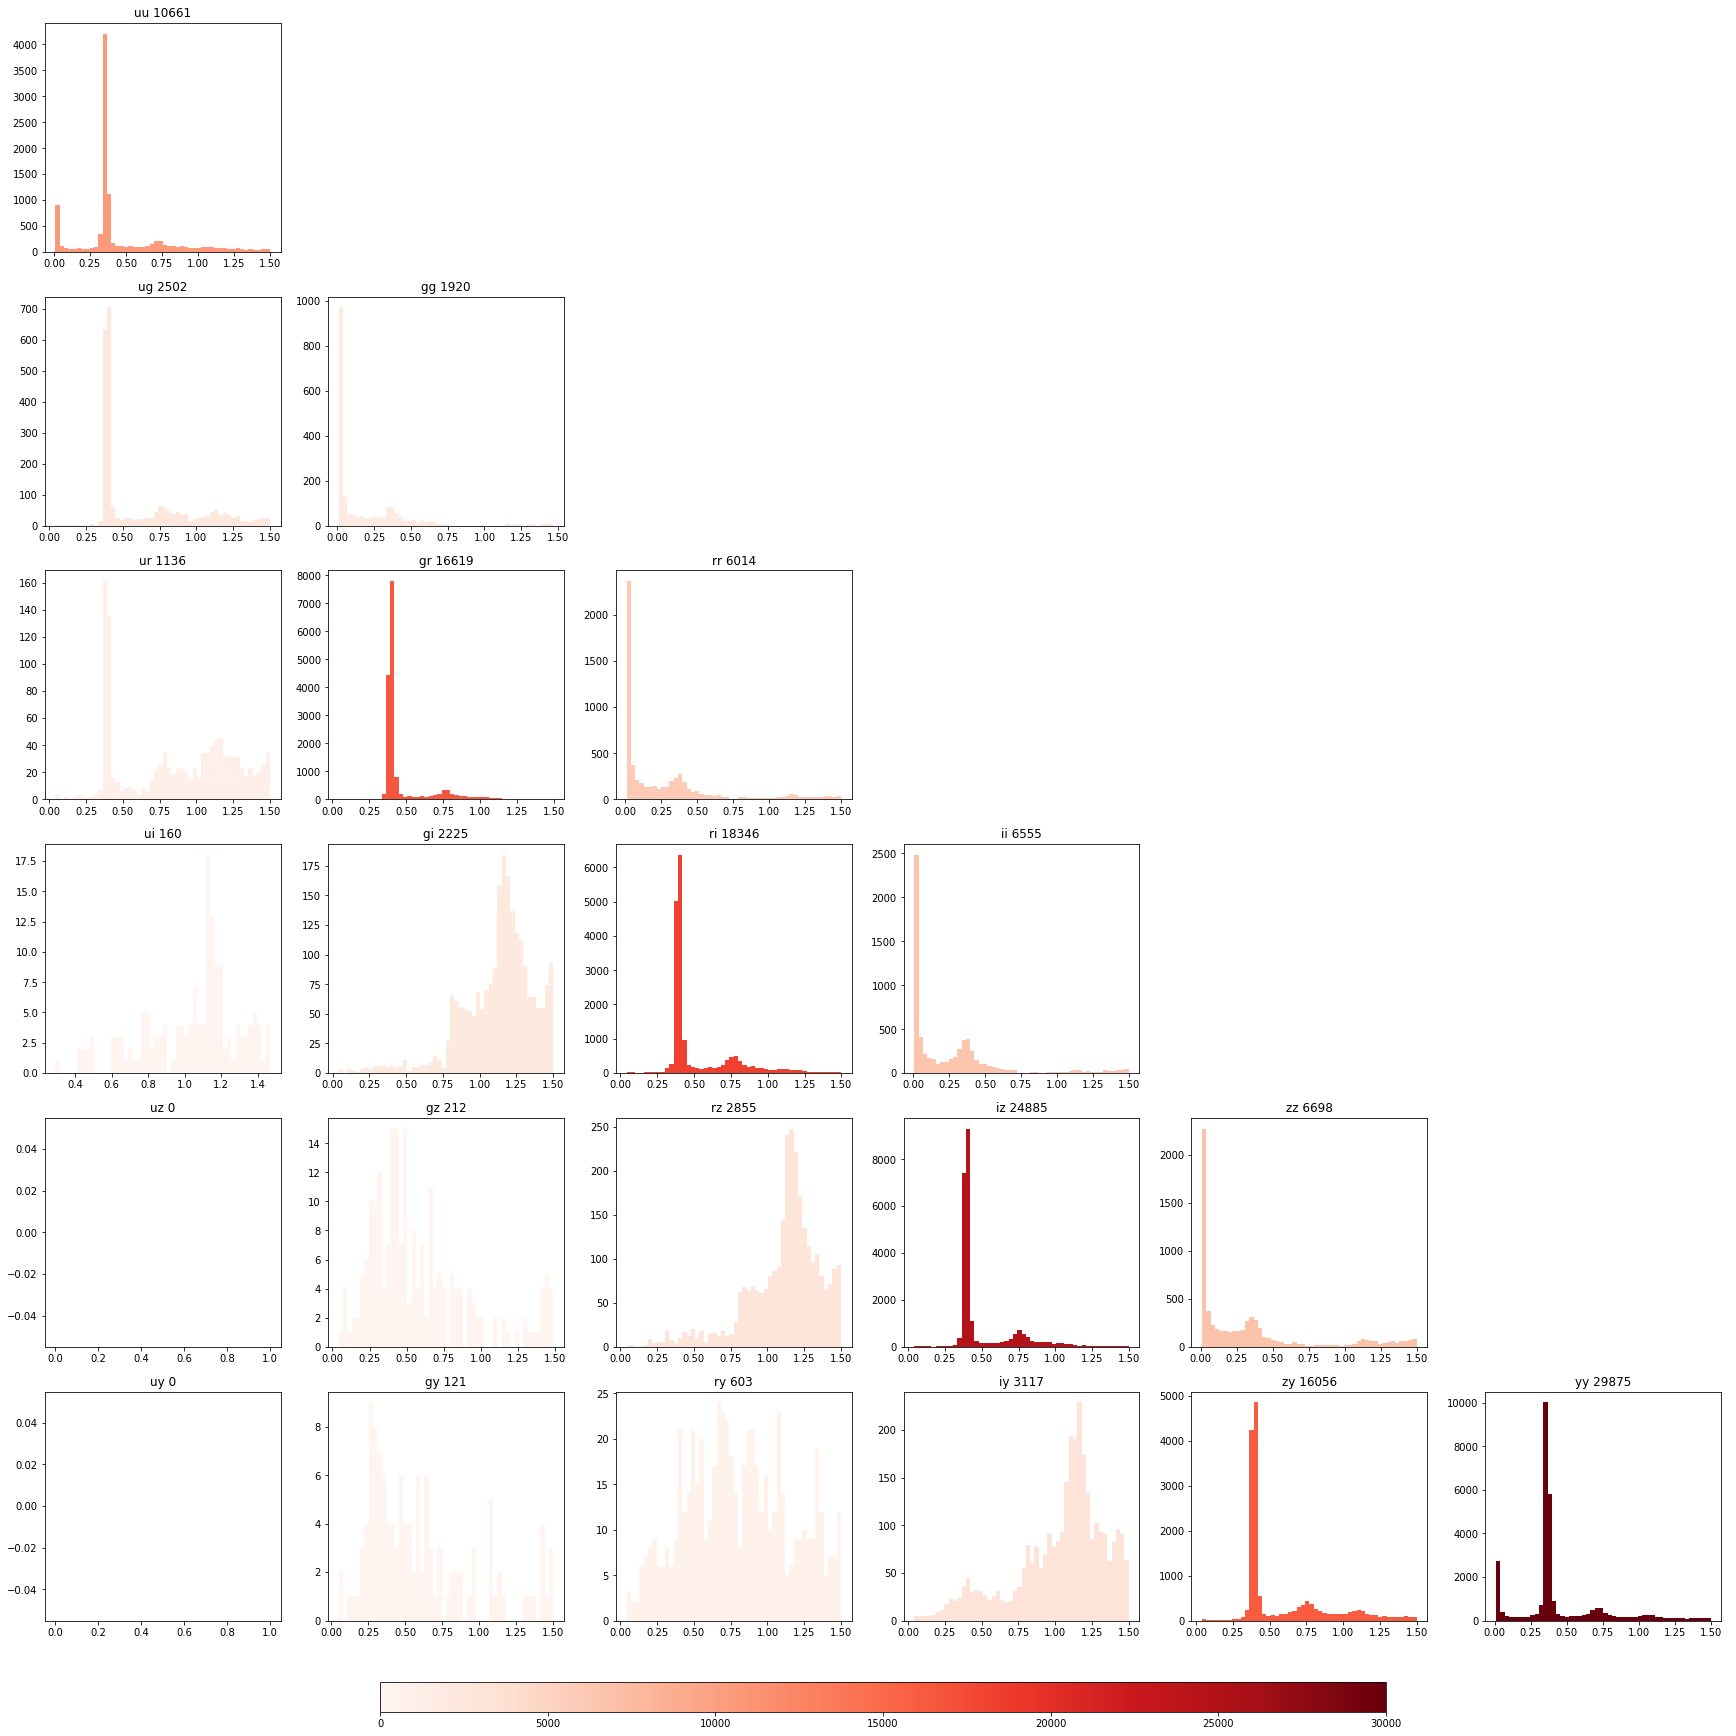

In [179]:
plot_hist_triangle_all(dbname="baseline_v1.4_10yrs.db", DD=True, nside=16, vmax=30000)

loading data/tFilter_uu_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ug_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ur_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ui_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_uz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_uy_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gg_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gr_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gi_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gy_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_rr_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ri_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_rz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ry_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ii_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading 

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


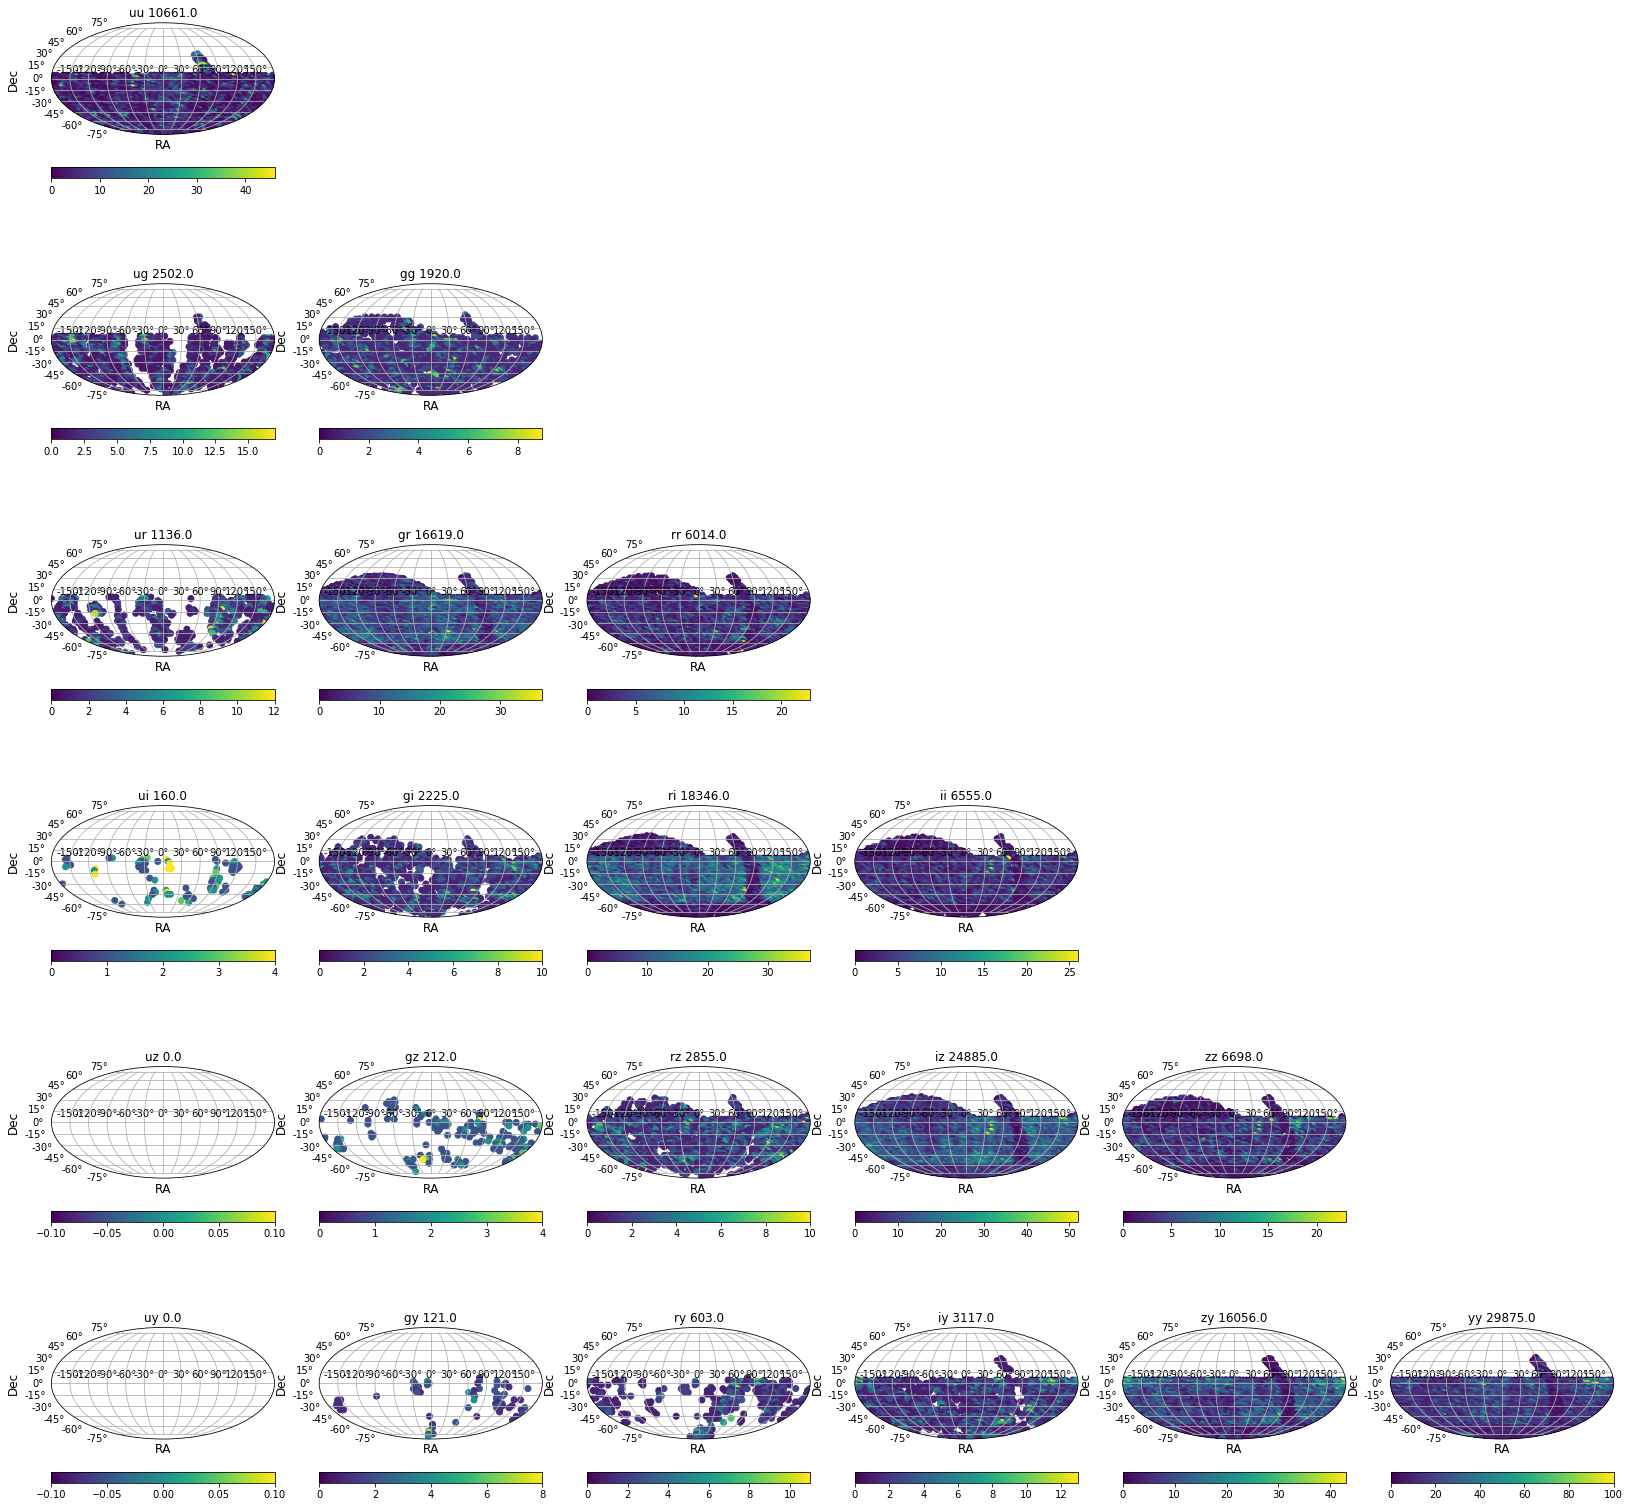

In [174]:
plot_skymaps(dbname="baseline_v1.4_10yrs.db", DD=True, nside=16)

In [180]:
df_dict = load_df_dict(dbname="baseline_v1.4_10yrs.db", DD=True, nside=16) # no DD, need to change filename


loading data/tFilter_uu_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ug_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ur_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ui_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_uz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_uy_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gg_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gr_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gi_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_gy_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_rr_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ri_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_rz_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ry_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading data/tFilter_ii_baseline_v1.4_10yrs.db_nside16_DD.pkl
loading 

In [181]:
df_dict.keys()

dict_keys(['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy'])

In [182]:
flt = ['u', 'g', 'r', 'i', 'z', 'y']
for i, f0 in enumerate(flt):
    #filename = 'data/tGaps_{}{}_{}.pkl'.format(f0, f0, dbname)
    #df = pd.read_pickle(filename)
    df = df_dict['{}{}'.format(f0, f0)]
    Nv = np.unique( np.concatenate(df.t_f0) ).shape[0]
    
    print(f0, Nv)


u 10467
g 12545
r 29717
i 32361
z 30927
y 40058


---

compare results from opsim database directly 

In [124]:
# load from csv
df = pd.read_csv("data/night_0_400_baseline_v1.4_10yrs.db")

In [125]:
df.to_csv("data/night_0_400_baseline_v1.4_10yrs.db.csv")

In [126]:
df.head()

,night,fieldDec,observationStartMJD,fieldRA,filter,fiveSigmaDepth
0,1,4.470982,59853.985644,294.696105,z,22.053188
1,1,3.424593,59853.986058,297.734708,z,22.067990
2,1,2.671025,59853.986472,300.801528,z,22.171052
3,1,0.734934,59853.986884,298.330258,z,22.220696
4,1,-1.054837,59853.987297,295.864474,z,22.286646


In [131]:
df[['observationStartMJD','filter']].groupby(by='filter').count()

,observationStartMJD
filter,
g,20076
i,50478
r,46921
u,15760
y,61880
z,49854
